Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

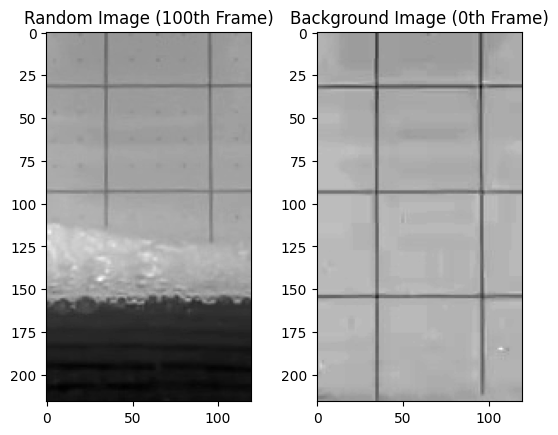

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


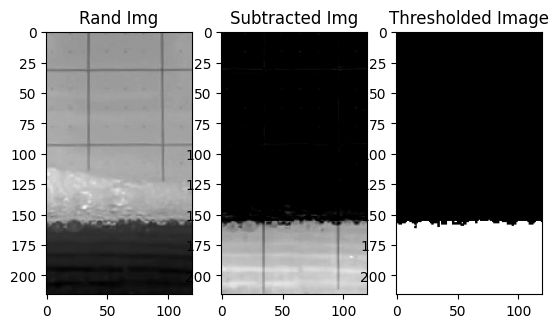

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

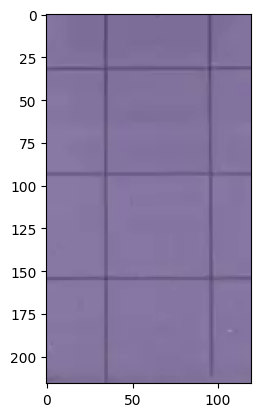

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# **Answers**

**1)**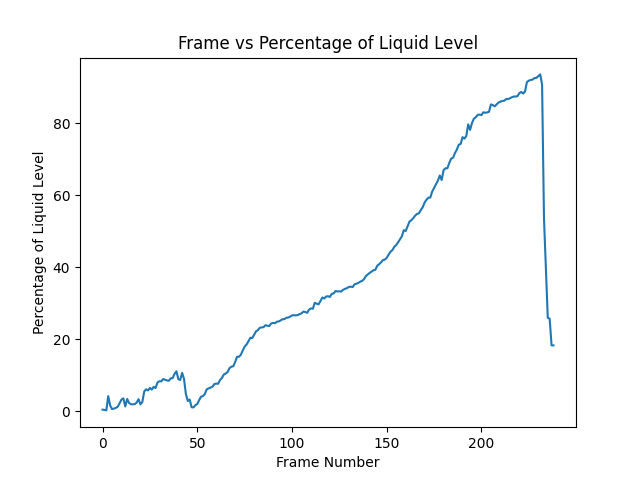

2.)Otsu's thresholding is an advanced binarization technique used to automatically determine the optimal threshold value for separating objects in an image based on its histogram. Unlike simple global thresholding, which uses a fixed threshold value, Otsu's method finds the threshold that minimizes the within-class variance (the variance within the pixel groups below and above the threshold). This makes it especially useful for bimodal images where pixel intensities form two distinct peaks.

The method is typically applied to grayscale images and is implemented in OpenCV using the cv.threshold() function with the cv.THRESH_OTSU flag. It can also be combined with preprocessing techniques like Gaussian blurring to improve results by reducing noise before applying the threshold. Otsu's approach is particularly effective when the image histogram clearly reflects two separate distributions

**3)** 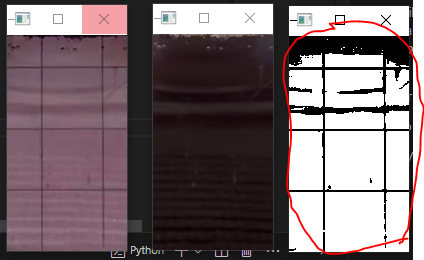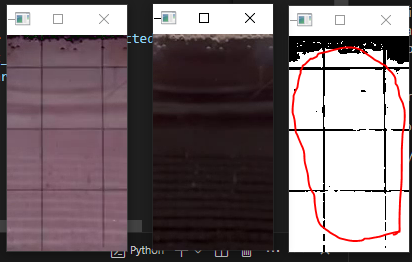

4)The code starts by importing cv2 (for video and image processing) and matplotlib.pyplot (for plotting). The process_frame_difference function processes the difference between a reference frame (the first frame of the video) and the current frame. It computes the absolute difference, converts it to grayscale, and applies thresholding to create a binary image. Contours are extracted from this binary image, and the largest contour's area is calculated as a percentage of the frame area.

The plot_contour_percentages function plots the contour area percentages (representing changes such as liquid levels) over time using a line graph. The x-axis is the frame number, and the y-axis is the percentage of the detected area.

The result, frame_diff, is an image where each pixel value represents the absolute difference between the corresponding pixels in the reference_frame and current_frame. This is typically used to detect changes or motion between the two frames.

The result, binary_thresh, is a binary image where pixels are either 0 or 255, effectively segmenting the image based on the computed threshold. This is useful for separating foreground from background or detecting objects.

The analyze_video function handles video processing. It reads frames from a video file and uses the process_frame_difference function to analyze changes frame by frame. Each frame is displayed in three views: the original frame, the difference frame, and the binary threshold frame. The user can press the 'q' key to stop the video processing. The calculated area percentages for each frame are stored in a list.

After processing the video, the plot_contour_percentages function is called to visualize the changes (e.g., liquid level variations) over the frames as a line graph.

The script ends by calling analyze_video with the path to a video file (demo2_images/liquidVideo.mp4). If the video cannot be opened, an error message is displayed. This analysis is suitable for applications like liquid level monitoring, detecting motion, or changes in a visual scene.

In [ ]:
import cv2
import matplotlib.pyplot as plt

def process_frame_difference(reference_frame, current_frame):

    # Compute frame difference
    frame_diff = cv2.absdiff(reference_frame, current_frame)

    # Convert the difference image to grayscale
    gray_diff = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)

    # Thresholding to obtain a binary image
    _, binary_thresh = cv2.threshold(gray_diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Extract contours
    contours, _ = cv2.findContours(binary_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate largest contour area percentage
    if contours:
        max_contour_area = max(cv2.contourArea(contour) for contour in contours)
        total_frame_area = current_frame.shape[0] * current_frame.shape[1]
        area_percentage = (max_contour_area / total_frame_area) * 100
    else:
        area_percentage = 0

    return binary_thresh, frame_diff, area_percentage

def plot_contour_percentages(contour_percentages):

    plt.plot(range(len(contour_percentages)), contour_percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Liquid Level')
    plt.title('Frame vs Percentage of Liquid Level')
    plt.show()

def analyze_video(video_file):

    cap = cv2.VideoCapture(video_file)
    if not cap.isOpened():
        print(f"Error: Cannot open video file {video_file}")
        return

    success, reference_frame = cap.read()
    if not success:
        print("Error: Failed to read the initial frame.")
        cap.release()
        return

    contour_percentages = []
    frame_index = 0

    while True:
        success, current_frame = cap.read()
        if not success:
            break

        # Process frame difference
        binary_thresh, frame_diff, area_percentage = process_frame_difference(reference_frame, current_frame)
        contour_percentages.append(area_percentage)

        # Display frames
        cv2.imshow('Original Frame', current_frame)
        cv2.imshow('Difference Frame', frame_diff)
        cv2.imshow('Binary Threshold', binary_thresh)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_index += 1

    cap.release()
    cv2.destroyAllWindows()

    # Plot results
    plot_contour_percentages(contour_percentages)


video_file_path = 'demo2_images/liquidVideo.mp4'
analyze_video(video_file_path)
